# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

#### Original Exploration
[13_Matplotlib_Format_Charts.ipynb](../2_Advanced/13_Matplotlib_Format_Charts.ipynb)

In [56]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [57]:
df_I = df[df['job_country'] == 'India']
df_skills = df_I.explode('job_skills')


In [58]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False, inplace=False)

df_skills_count  

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


In [59]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

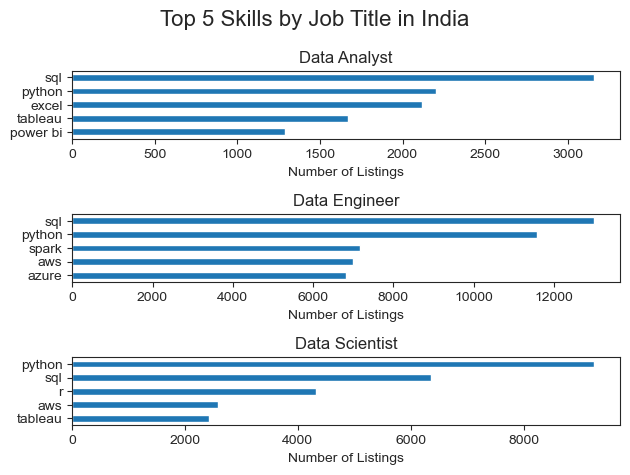

In [60]:
fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind ='barh',x='job_skills', y='skill_count', ax=ax[i], title = job_title)
    ax[i].set_xlabel('Number of Listings')
    ax[i].set_ylabel('')  
    ax[i].invert_yaxis()  # Highest values on top
    ax[i].legend().set_visible(False)
    
fig.suptitle('Top 5 Skills by Job Title in India', fontsize=16)
plt.tight_layout()
plt.show()
   



In [61]:
df_job_title_count = df_I['job_title_short'].value_counts().reset_index(name='jobs_total')

In [62]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how ='left', on = 'job_title_short')

df_skills_perc['skill_percentage'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percentage
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


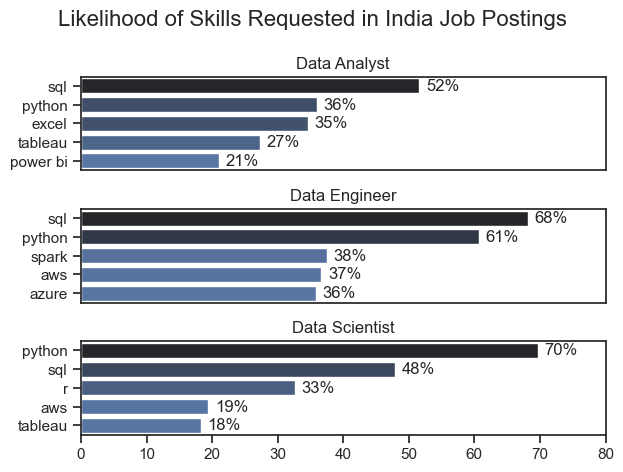

In [80]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style = 'ticks')

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot, y ='job_skills', x = 'skill_percentage', ax = ax[i], hue = 'skill_count', palette= 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')  
    ax[i].set_xlim(0,80)
    ax[i].get_legend().remove()

    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + 1,n, f'{v:.0f}%', va = 'center')
    
    if i != len(job_titles) - 1:    
        ax[i].set_xticks([])   

fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=16)
plt.tight_layout()
plt.show()